# Recurrent Neural Network

## import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
# get the data for stock price of google for last 4 years
import yfinance as yf
google=yf.Ticker('GOOG')
google_train=google.history(start='2014-07-18', end='2024-03-18')

In [ ]:
google_train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-07-18 00:00:00-04:00,29.535209,29.724474,28.987338,29.638807,80283816,0.0,0.0
2014-07-21 00:00:00-04:00,29.472952,29.604938,29.148363,29.359392,41242922,0.0,0.0
2014-07-22 00:00:00-04:00,29.421651,29.866421,29.415672,29.621872,33983045,0.0,0.0
2014-07-23 00:00:00-04:00,29.546665,29.776770,29.510304,29.683632,24663528,0.0,0.0
2014-07-24 00:00:00-04:00,29.707041,29.858950,29.473946,29.552641,20702684,0.0,0.0


In [ ]:
google_train.reset_index(inplace=True)

In [ ]:
google_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          2432 non-null   datetime64[ns, America/New_York]
 1   Open          2432 non-null   float64                         
 2   High          2432 non-null   float64                         
 3   Low           2432 non-null   float64                         
 4   Close         2432 non-null   float64                         
 5   Volume        2432 non-null   int64                           
 6   Dividends     2432 non-null   float64                         
 7   Stock Splits  2432 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 152.1 KB


In [4]:
data_train=google_train[['Close']]
data_train.reset_index(drop=True,inplace=True)
data_train

,Close
0,29.638807
1,29.359392
2,29.621872
3,29.683632
4,29.552641
...,...
2427,138.782074
2428,139.461288
2429,140.610001
2430,144.175934


In [5]:
close_data=data_train.iloc[:,0].values # take out close col arr whis is one_dim
close_data=close_data.reshape(-1,1) # reshape it to two dimensional
np.round(close_data,2) # round it to 2 decimal


array([[ 29.64],
       [ 29.36],
       [ 29.62],
       ...,
       [140.61],
       [144.18],
       [142.01]])

In [6]:
from sklearn.preprocessing import MinMaxScaler # output(0,1) # scale the data
sc=MinMaxScaler()
train_data=sc.fit_transform(close_data)
train_data

array([[0.03924215],
       [0.03709498],
       [0.03911201],
       ...,
       [0.89200183],
       [0.9194043 ],
       [0.90274779]])

Create a data structure with 60 timestamps and 1 output

In [ ]:
train_data[0:61]

array([[0.03924215],
       [0.03709498],
       [0.03911201],
       [0.0395866 ],
       [0.03858   ],
       [0.03692274],
       [0.03752746],
       [0.03561761],
       [0.03631037],
       [0.03025544],
       [0.02813891],
       [0.0308487 ],
       [0.02775617],
       [0.02825525],
       [0.02710169],
       [0.0291723 ],
       [0.02883166],
       [0.02686056],
       [0.03147255],
       [0.0314228 ],
       [0.030975  ],
       [0.03429717],
       [0.03609603],
       [0.03518895],
       [0.03476027],
       [0.03445026],
       [0.03354699],
       [0.03265139],
       [0.03002581],
       [0.02933687],
       [0.03025544],
       [0.03244853],
       [0.03268201],
       [0.03422827],
       [0.03579749],
       [0.03719066],
       [0.03385702],
       [0.03465694],
       [0.03398714],
       [0.03179405],
       [0.03082956],
       [0.03345131],
       [0.0352961 ],
       [0.03701844],
       [0.03962487],
       [0.03629123],
       [0.03390295],
       [0.036

In [8]:
X_train=[]
y_train=[]

for i in range (60,2432):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

X_train[0], y_train[0]


(array([0.03924215, 0.03709498, 0.03911201, 0.0395866 , 0.03858   ,
        0.03692274, 0.03752746, 0.03561761, 0.03631037, 0.03025544,
        0.02813891, 0.0308487 , 0.02775617, 0.02825525, 0.02710169,
        0.0291723 , 0.02883166, 0.02686056, 0.03147255, 0.0314228 ,
        0.030975  , 0.03429717, 0.03609603, 0.03518895, 0.03476027,
        0.03445026, 0.03354699, 0.03265139, 0.03002581, 0.02933687,
        0.03025544, 0.03244853, 0.03268201, 0.03422827, 0.03579749,
        0.03719066, 0.03385702, 0.03465694, 0.03398714, 0.03179405,
        0.03082956, 0.03345131, 0.0352961 , 0.03701844, 0.03962487,
        0.03629123, 0.03390295, 0.03652853, 0.03157972, 0.0323605 ,
        0.03207728, 0.03246002, 0.02898094, 0.02967369, 0.03166393,
        0.0324562 , 0.02724711, 0.03059991, 0.0261525 , 0.01987941]),
 0.01556213455034508)

In [9]:
X_train.shape, y_train.shape

((2372, 60), (2372,))

In [ ]:
df=pd.DataFrame(X_train)

In [ ]:
df['target_close']=y_train

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,target_close
0,0.039242,0.037095,0.039112,0.039587,0.038580,0.036923,0.037527,0.035618,0.036310,0.030255,...,0.032460,0.028981,0.029674,0.031664,0.032456,0.027247,0.030600,0.026152,0.019879,0.015562
1,0.037095,0.039112,0.039587,0.038580,0.036923,0.037527,0.035618,0.036310,0.030255,0.028139,...,0.028981,0.029674,0.031664,0.032456,0.027247,0.030600,0.026152,0.019879,0.015562,0.017372
2,0.039112,0.039587,0.038580,0.036923,0.037527,0.035618,0.036310,0.030255,0.028139,0.030849,...,0.029674,0.031664,0.032456,0.027247,0.030600,0.026152,0.019879,0.015562,0.017372,0.014345
3,0.039587,0.038580,0.036923,0.037527,0.035618,0.036310,0.030255,0.028139,0.030849,0.027756,...,0.031664,0.032456,0.027247,0.030600,0.026152,0.019879,0.015562,0.017372,0.014345,0.012232
4,0.038580,0.036923,0.037527,0.035618,0.036310,0.030255,0.028139,0.030849,0.027756,0.028255,...,0.032456,0.027247,0.030600,0.026152,0.019879,0.015562,0.017372,0.014345,0.012232,0.007127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,0.837273,0.839806,0.833896,0.838809,0.864522,0.871508,0.883482,0.899908,0.906969,0.907737,...,0.886859,0.866365,0.884403,0.871354,0.841572,0.838348,0.828984,0.849555,0.857614,0.877955
2368,0.839806,0.833896,0.838809,0.864522,0.871508,0.883482,0.899908,0.906969,0.907737,0.897145,...,0.866365,0.884403,0.871354,0.841572,0.838348,0.828984,0.849555,0.857614,0.877955,0.883175
2369,0.833896,0.838809,0.864522,0.871508,0.883482,0.899908,0.906969,0.907737,0.897145,0.895916,...,0.884403,0.871354,0.841572,0.838348,0.828984,0.849555,0.857614,0.877955,0.883175,0.892002
2370,0.838809,0.864522,0.871508,0.883482,0.899908,0.906969,0.907737,0.897145,0.895916,0.893230,...,0.871354,0.841572,0.838348,0.828984,0.849555,0.857614,0.877955,0.883175,0.892002,0.919404


In [10]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # reshape to 3 dimensions bcoz rnn takes 3 dimensions data
X_train.shape

(2372, 60, 1)

# Part 2:- Build the RNN Model

## # import the keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initalize the RNN Model

In [13]:
regressor=Sequential()
# adding input shape and first lstm layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# adding second lstm layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#adding third lstm layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#adding forth lstm layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# adding output layer
regressor.add(Dense(units=1))

In [14]:
# change learning rate for adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

In [15]:
# compile the model
regressor.compile(optimizer=opt, loss='mean_squared_error')

In [ ]:
# use early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=20)

In [16]:
history=regressor.fit(X_train, y_train, epochs=70, batch_size=32)

Epoch 1/70
75/75 [==============================] - 19s 133ms/step - loss: 0.0315
Epoch 2/70
75/75 [==============================] - 8s 112ms/step - loss: 0.0035
Epoch 3/70
75/75 [==============================] - 10s 134ms/step - loss: 0.0029
Epoch 4/70
75/75 [==============================] - 10s 133ms/step - loss: 0.0030
Epoch 5/70
75/75 [==============================] - 9s 118ms/step - loss: 0.0023
Epoch 6/70
75/75 [==============================] - 10s 129ms/step - loss: 0.0028
Epoch 7/70
75/75 [==============================] - 10s 133ms/step - loss: 0.0019
Epoch 8/70
75/75 [==============================] - 10s 130ms/step - loss: 0.0020
Epoch 9/70
75/75 [==============================] - 11s 146ms/step - loss: 0.0018
Epoch 10/70
75/75 [==============================] - 11s 152ms/step - loss: 0.0017
Epoch 11/70
75/75 [==============================] - 14s 182ms/step - loss: 0.0018
Epoch 12/70
75/75 [==============================] - 11s 148ms/step - loss: 0.0018
Epoch 13/70
75/

In [18]:
regressor.save('model.h5')

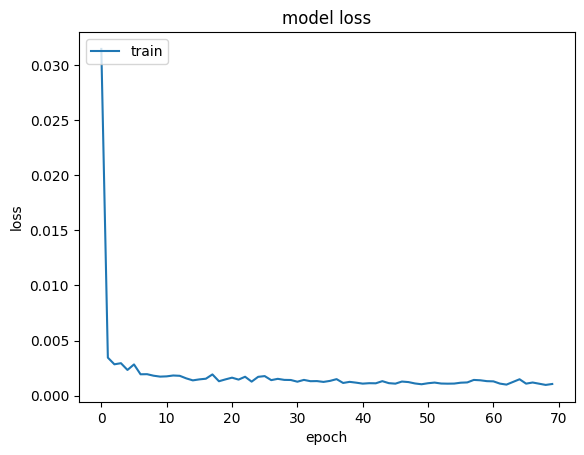

In [19]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
import yfinance as yf
google=yf.Ticker('GOOG')
google_test=google.history(start='2024-03-19', end='2024-07-18')
google_test.reset_index(inplace=True)
google_test['Date']=google_test['Date'].astype(str)
google_test['Date']=google_test['Date'].str[:10]
google_test['Date']=pd.to_datetime(google_test['Date'])

In [21]:
# creating test data
data_test=google_test[['Close']]



In [22]:
test=google_test['Close'].values
test=test.reshape(-1,1)
test=sc.transform(test) # scaling the test



In [26]:
df_new=pd.concat((data_train.iloc[-60:,:], data_test), axis=0)
df_new.reset_index(drop=True,inplace=True)
df_new

,Close
0,137.943039
1,139.501251
2,141.638824
3,142.557770
4,142.657669
...,...
138,187.300003
139,186.779999
140,188.190002
141,185.500000


In [30]:
test_new=df_new.iloc[:,0].values
test_new=test_new.reshape(-1,1)
test_new=sc.transform(test_new)

In [31]:
X_test=[]

for i in range (60,143):
  X_test.append(test_new[i-60:i,0])


X_test=np.array(X_test)
X_test.shape

(83, 60)

In [32]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) # reshape to 3 dimensions bcoz rnn takes 3 dimensions data

In [33]:
predicted_stock_price=regressor.predict(X_test) # predict on test_data

predicted_stock_price=sc.inverse_transform(predicted_stock_price) # inverse the scaling

3/3 [==============================] - 3s 47ms/step


In [34]:
predicted_stock_price

array([[141.73868],
       [145.55214],
       [146.16434],
       [145.87997],
       [148.1112 ],
       [147.59348],
       [148.29413],
       [148.5078 ],
       [148.70714],
       [150.68208],
       [150.03293],
       [150.7904 ],
       [148.75026],
       [150.36871],
       [150.78441],
       [151.4342 ],
       [151.26904],
       [152.80576],
       [151.99104],
       [151.26474],
       [151.56682],
       [151.66551],
       [151.67046],
       [150.83194],
       [152.00716],
       [152.43541],
       [152.86572],
       [151.66795],
       [154.78792],
       [153.70854],
       [154.07942],
       [154.82045],
       [155.7398 ],
       [155.98788],
       [156.29996],
       [156.6956 ],
       [156.7553 ],
       [157.06807],
       [156.70789],
       [157.03867],
       [157.13565],
       [157.4181 ],
       [157.7001 ],
       [157.98383],
       [158.2418 ],
       [158.46526],
       [158.56401],
       [158.23462],
       [158.00043],
       [158.33582],


In [35]:
data_test

,Close
0,147.751862
1,149.509857
2,148.570938
3,151.597488
4,150.978195
...,...
78,187.300003
79,186.779999
80,188.190002
81,185.500000


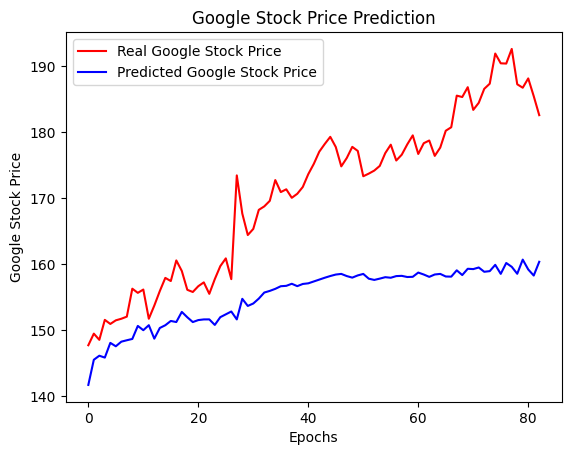

In [36]:
plt.plot(data_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Epochs')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(data_test, predicted_stock_price))
print(mean_absolute_error(data_test, predicted_stock_price))

310.8883542203126
15.439708112234092
